MLP 实现图像多分类

任务:基于mnist数据集，建立mlp模型，实现0-9数字的十分类:

1. 实现mnist数据载入，可视化图形数字
2. 完成数据预处理:图像数据维度转换与归一化、输出结果格式转换
3. 计算模型在预测数据集的准确率
4. 模型结构:两层隐藏层，每层有392个神经元

In [4]:
#load the mnist data
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


(28, 28)


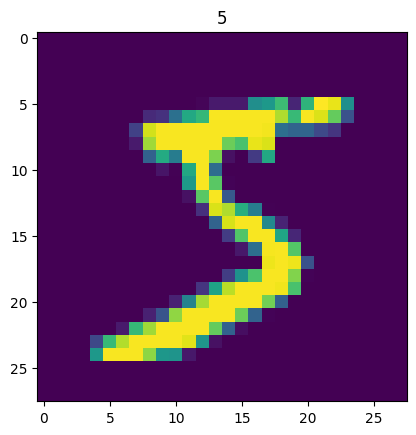

In [6]:
#virtual the data

img1 = x_train[0]
print(img1.shape)
from matplotlib import pyplot as plt
fig1 = plt.figure()

plt.imshow(img1)
plt.title(y_train[0])
plt.show()

In [10]:
feature_size = img1.shape[0]*img1.shape[1]
print(feature_size)
x_train_format = x_train.reshape(x_train.shape[0], feature_size)
print(x_train.shape[0], x_train_format.shape)
x_test_format = x_test.reshape(x_test.shape[0], feature_size)
print(x_test.shape[0], x_test_format.shape)

784
60000 (60000, 784)
10000 (10000, 784)


In [11]:
#图像数据是255的，太大，归一化，每个数值都是小于0-1之间的数
x_train_normal = x_train_format / 255.0
x_test_normal = x_test_format / 255.0
print(x_train_normal.min(), x_train_normal.max())


0.0 1.0


In [14]:
#输出数据格式转换
from keras.utils import to_categorical
y_train_format = to_categorical(y_train)
y_test_format = to_categorical(y_test)
print(y_train[0])
print(y_train_format[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [15]:
#创建多分类模型
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
mlp.add(Dense(units=392, activation='sigmoid', input_dim=feature_size))
mlp.add(Dense(units=392, activation='sigmoid'))
#多分类用softmax激活函数
mlp.add(Dense(units=10, activation='softmax'))
mlp.summary()

/usr/local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-13 17:14:14.486346: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 392)            │       307,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 392)            │       154,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         3,930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 465,706 (1.78 MB)

 Trainable params: 465,706 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
#模型配置,多分类损失函数用categorical_crossentropy
mlp.compile(optimizer='adam', loss='categorical_crossentropy')
mlp.fit(x_train_format, y_train_format, epochs=10, batch_size=10)

Epoch 1/10


2025-11-13 17:16:13.498237: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47040000 exceeds 10% of free system memory.


6000/6000 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - loss: 0.5730
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 59s 10ms/step - loss: 0.3156
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 43s 7ms/step - loss: 0.2531
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - loss: 0.2173
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 86s 8ms/step - loss: 0.1934
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 51s 9ms/step - loss: 0.1693
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - loss: 0.1590
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 36s 6ms/step - loss: 0.1426
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step - loss: 0.1395
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step - loss: 0.1373


In [ ]:
#计算准确度
import numpy as np
y_train_prob = mlp.predict(x_train_normal)
y_train_predict = np.argmax(y_train_prob, axis=1)
#y_train_predict = np.round(y_train_predict).astype(int)
print(y_train_predict)
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, y_train_predict)
print('训练集准确率：', accuracy_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
[5 0 4 ... 5 6 8]
训练集准确率： 0.9705833333333334


In [25]:
y_test_prob = mlp.predict(x_test_normal)
y_test_predict = np.argmax(y_test_prob, axis=1)
#y_test_predict = np.round(y_test_predict).astype(int)
accuracy_test = accuracy_score(y_test, y_test_predict)
print('测试集准确率：', accuracy_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
测试集准确率： 0.9662


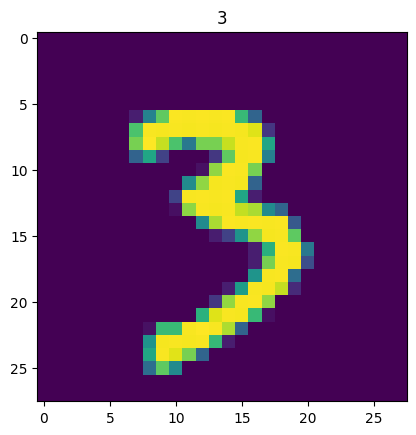

In [29]:
img2 = x_test[30]
fig2 = plt.figure()
plt.imshow(img2)
plt.title(y_test_predict[30])
plt.show()